Data Overview:
        Date     Category  Amount Transaction Type
0 2022-01-01      Grocery      50         Purchase
1 2022-01-02  Electronics     120         Purchase
2 2022-01-03     Clothing      30           Refund
3 2022-01-04      Grocery      40         Purchase
4 2022-01-05  Electronics     100         Purchase


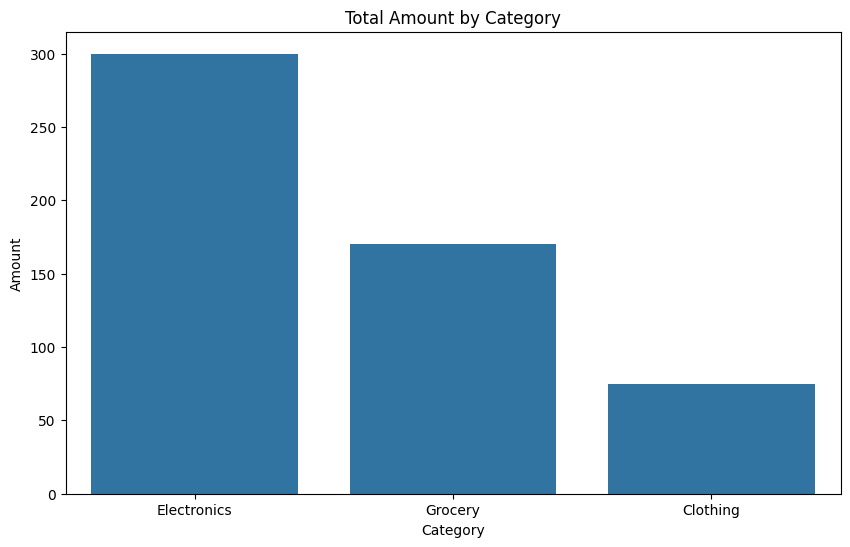

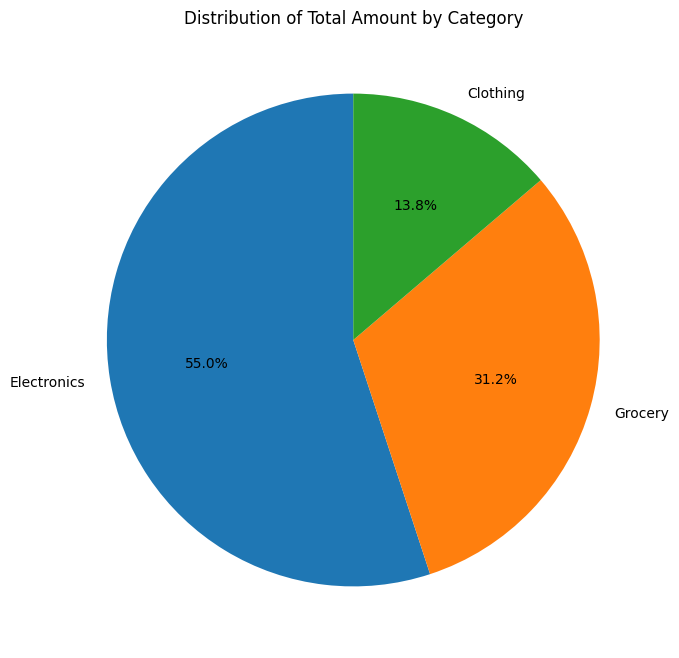

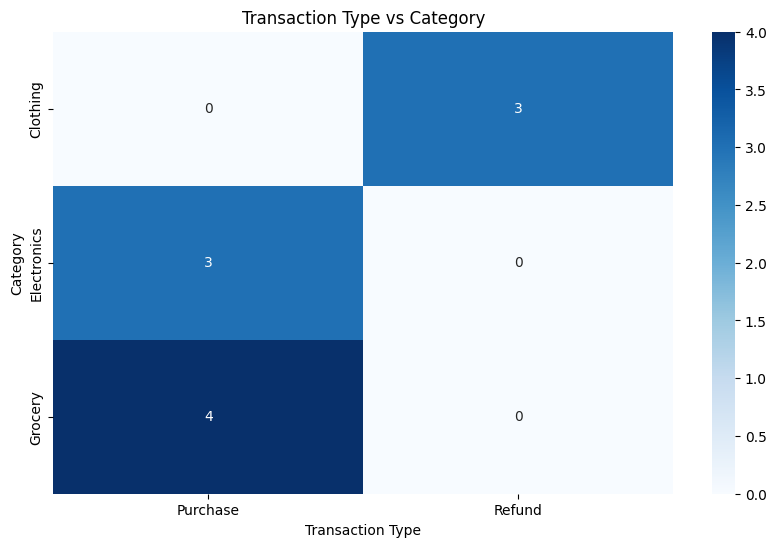

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import table

# Sample dataset
data = {
    'Date': pd.date_range('2022-01-01', '2022-01-10'),
    'Category': ['Grocery', 'Electronics', 'Clothing', 'Grocery', 'Electronics', 'Clothing', 'Grocery', 'Electronics', 'Clothing', 'Grocery'],
    'Amount': [50, 120, 30, 40, 100, 25, 35, 80, 20, 45],
    'Transaction Type': ['Purchase', 'Purchase', 'Refund', 'Purchase', 'Purchase', 'Refund', 'Purchase', 'Purchase', 'Refund', 'Purchase']
}

df = pd.DataFrame(data)

# Data overview
print("Data Overview:")
print(df.head())

# Summary statistics
summary_stats = df.describe()

# Crosstabs
crosstab_data = pd.crosstab(df['Category'], df['Transaction Type'])

# Data Grouping & Sorting
grouped_data = df.groupby('Category').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False)

# Data Filtering
filtered_data = df[df['Amount'] > 0]

# Data Visualization

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Amount', data=grouped_data.reset_index())
plt.title('Total Amount by Category')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['Amount'], labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Amount by Category')
plt.show()

# Scatter plot
scatter_plot = px.scatter(df, x='Date', y='Amount', color='Category', title='Amount Over Time')
scatter_plot.show()

# Crosstab visualization
plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab_data, annot=True, cmap='Blues', fmt='d')
plt.title('Transaction Type vs Category')
plt.show()


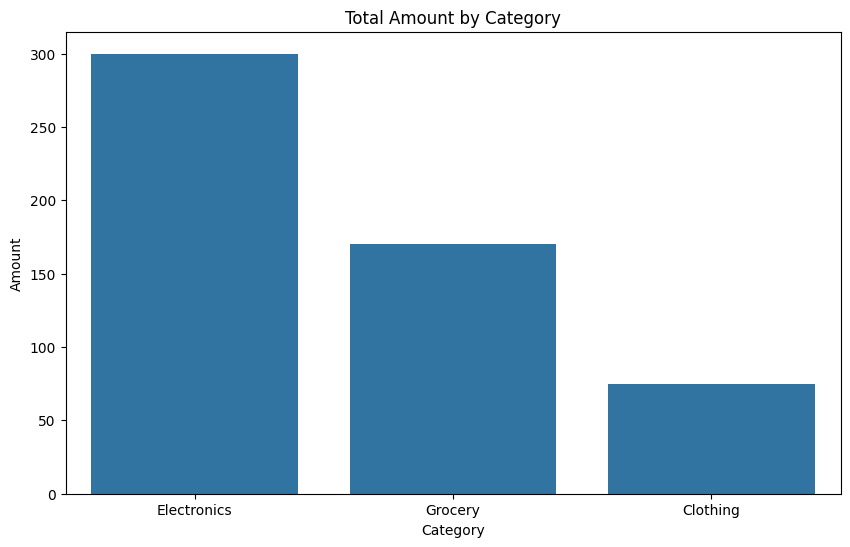

In [ ]:
# Save reports to different output formats
from matplotlib.backends.backend_pdf import PdfPages

# Save summary statistics to CSV
summary_stats.to_csv('summary_stats.csv')

# Save crosstab to Excel
crosstab_data.to_excel('crosstab_report.xlsx')

# Save scatter plot to PDF
# Create a new PDF file
with PdfPages('scatter_plot.pdf') as pdf:
    # Create a new figure
    fig, ax = plt.subplots()

    # Plot your scatter plot on the figure's axes
    ax.scatter(x=df['Date'], y=df['Amount'])  # Replace x_data and y_data with your data

    # Save the figure to the PDF file
    pdf.savefig(fig)

    # Close the figure
    plt.close(fig)

# Save bar chart to PNG
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Amount', data=grouped_data.reset_index())
plt.title('Total Amount by Category')
plt.savefig('bar_chart.png')

# Save grouped data to XML (requires additional XML library)
# xml_output = grouped_data.to_xml()
# with open('grouped_data.xml', 'w') as f:
#     f.write(xml_output)
